#Prediction Challenge 3- Deep Reinforcement Learning


In [1]:
#importing necessary libraries
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 1.8 MB/s eta 0:00:00


GYM-It provides a collection of environments to test and develop reinforcement learning algorithms, including classic control problems, Atari games, and robotics tasks. Gym also provides a standardized interface for these environments, making it easy to train and test reinforcement learning algorithms across different environments. Gym is developed by OpenAI and is open source, meaning that anyone can use and contribute to its development.

In [2]:
!pip install gym
#Gym is an tool kit and developing reinforcement  Learnig algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# load the gym module tool kit
import gym
#to visualize
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
#simple forward network 
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
#name of the environment we are using
env = gym.make(ENV_NAME)
#creating the instance of the environment

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

In [5]:
env.observation_space.shape
#pre defined input in the environmnet

(4,)

In [6]:
env.action_space.n

2

#Model 1


In [8]:
# Q-Network
model1 = Sequential()
model1.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model1.add(Flatten())
# add extra layers here
model1.add(Dense(16, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))

model1.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 11,314
Trainable params: 11,314
Non-trai

The network takes as input a single observation vector of size env.observation_space.shape[0], which corresponds to the number of observations in the observation space of the environment. The input layer is followed by a Flatten layer that flattens the input tensor into a 1-dimensional vector.

The network then has four fully connected (Dense) hidden layers with 16, 32, 64, and 128 units, respectively, each using ReLU activation. These layers allow the network to learn complex representations of the state space.

Finally, the network has an output layer with env.action_space.n units, which corresponds to the number of actions in the action space of the environment. The output layer uses a linear activation function to produce the Q-values for each action.

In [12]:
memory = SequentialMemory(limit=2500, window_length=1)
"""This creates a memory buffer that stores the agent's experiences during training. 
In this case, the buffer has a limit of 2500 experiences, and each experience consists of a single observation."""
# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)
""" This defines the exploration policy for the agent. In this case, 
it uses an Epsilon Greedy policy with an initial exploration rate of 1.0, which means the agent takes random actions at first. 
The exploration rate is linearly annealed over 10,000 steps down to a minimum value of 0.1,
 which means the agent starts to rely more on its learned policy as training progresses."""

# define the agent
dqn = DQNAgent(model=model1, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 
""" This creates the DQN agent using the previously defined neural network model,
 with the number of actions in the environment's action space env.action_space.n. 
 The memory argument specifies the memory buffer to be used for experience replay, 
and nb_steps_warmup specifies the number of random steps to take before learning starts. """

dqn.compile(Adam(lr=1e-3), metrics=['mae'])



history_1 = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)
"""his fits the DQN agent to the environment for 10,000 steps. 
The visualize argument specifies whether to display the environment during training, 
and verbose controls the verbosity of the training output.
 The function returns a history object that contains information about the training process, 
 such as the rewards obtained at each step. """

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Training for 10000 steps ...
   45/10000: episode: 1, duration: 0.194s, episode steps:  45, steps per second: 232, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.489 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   83/10000: episode: 2, duration: 0.038s, episode steps:  38, steps per second: 1004, episode reward: 38.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.395 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   97/10000: episode: 3, duration: 0.013s, episode steps:  14, steps per second: 1108, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.714 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  113/10000: episode: 4, duration: 1.316s, episode steps:  16, steps per second:  12, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.375 [0.000, 1.000],  loss: 0.382911, mae: 0.506274, mean_q: 0.186772, mean_eps: 0.990415
  139/10000: episode: 5, duration: 0.296s, episode steps:  26, steps per second:  88, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.577 [0.000, 1.000],  loss: 0.118301, mae: 0.632972, mean_q: 0.918382, mean_eps: 0.988705
  171/10000: episode: 6, duration: 0.377s, episode steps:  32, steps per second:  85, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 0.022593, mae: 0.673793, mean_q: 1.229166, mean_eps: 0.986095
  184/10000: episode: 7, duration: 0.150s, episode steps:  13, steps per second:  87, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.692 [0.000, 1.000],  loss: 0.010111, mae: 0.721274, mean_q: 1.406162, mean_eps: 0

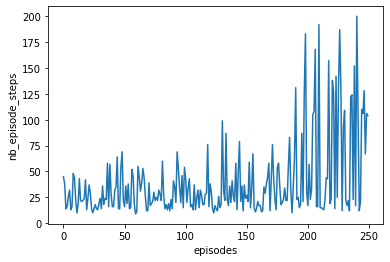

In [14]:
# summarize the history for number  of episode steps
plt.plot(history_1.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

In [15]:
for i in range(0,10):
    dqn.test(env, nb_episodes=20, visualize=False)
    print('\n')

Testing for 20 episodes ...
Episode 1: reward: 104.000, steps: 104
Episode 2: reward: 104.000, steps: 104
Episode 3: reward: 101.000, steps: 101
Episode 4: reward: 97.000, steps: 97
Episode 5: reward: 100.000, steps: 100
Episode 6: reward: 102.000, steps: 102
Episode 7: reward: 100.000, steps: 100
Episode 8: reward: 103.000, steps: 103
Episode 9: reward: 102.000, steps: 102
Episode 10: reward: 103.000, steps: 103
Episode 11: reward: 103.000, steps: 103
Episode 12: reward: 100.000, steps: 100
Episode 13: reward: 105.000, steps: 105
Episode 14: reward: 98.000, steps: 98
Episode 15: reward: 100.000, steps: 100
Episode 16: reward: 103.000, steps: 103
Episode 17: reward: 99.000, steps: 99
Episode 18: reward: 106.000, steps: 106
Episode 19: reward: 102.000, steps: 102
Episode 20: reward: 100.000, steps: 100


Testing for 20 episodes ...
Episode 1: reward: 100.000, steps: 100
Episode 2: reward: 106.000, steps: 106
Episode 3: reward: 101.000, steps: 101
Episode 4: reward: 102.000, steps: 102
E

from the above model 1 we can see that those are not near to 200 trying other model with different paramenters

#model2

In [16]:
# Q-Network
model_2 = Sequential()
model_2.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model_2.add(Flatten())
model_2.add(Dense(16, activation='relu'))

# adds a fully connected layer to the model with 16 units and a ReLU activation function.
model_2.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 16)                80        
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
memory = SequentialMemory(limit=2500, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)


# define the agent
dqn_1 = DQNAgent(model=model_2, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn_1.compile(Adam(lr=1e-3), metrics=['mae'])

history_2 = dqn_1.fit(env, nb_steps=10000, visualize=False, verbose=2)



/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...
   25/10000: episode: 1, duration: 0.188s, episode steps:  25, steps per second: 133, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   43/10000: episode: 2, duration: 0.024s, episode steps:  18, steps per second: 743, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   60/10000: episode: 3, duration: 0.013s, episode steps:  17, steps per second: 1267, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   75/10000: episode: 4, duration: 0.012s, episode steps:  15, steps per second: 1248, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  106/10000: episode: 5, duration: 0.875s, episode steps:  31, steps per second:  35, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.581 [0.000, 1.000],  loss: 31.903622, mae: 23.997589, mean_q: 46.100916, mean_eps: 0.990730
  118/10000: episode: 6, duration: 0.089s, episode steps:  12, steps per second: 134, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 26.609778, mae: 23.718660, mean_q: 45.605296, mean_eps: 0.989965
  133/10000: episode: 7, duration: 0.119s, episode steps:  15, steps per second: 126, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 37.144606, mae: 23.807058, mean_q: 45.162691, mean_eps: 0.988750
  144/10000: episode: 8, duration: 0.099s, episode steps:  11, steps per second: 111, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.182 [0.000, 1.000],  loss: 37.289199, mae: 23.756157, mean_q: 44.820741,

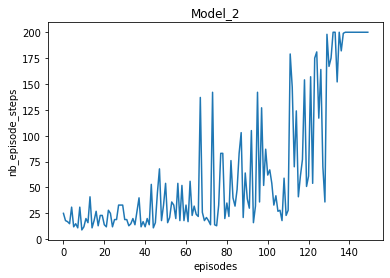

In [53]:
# summarize the history for number  of episode steps
plt.plot(history_2.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.title("Model_2")

plt.show()



In [23]:
for i in range(0,10):
    dqn_1.test(env, nb_episodes=20, visualize=False)
    print('\n')

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps:

as the reward is 200 for the consucutive 20 eposode but the mae value is 35 try adding more layers so we can get less mean absolute error value

#model_3

In [24]:
model_3 = Sequential()
model_3.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model_3.add(Flatten())
model_3.add(Dense(16, activation='relu'))
#addint the ayers
model_3.add(Dense(32, activation='relu'))
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))

# adds a fully connected layer to the model with 16 units and a ReLU activation function.
model_3.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model_3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 16)                80        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 2)                 130       
                                                                 
Total params: 2,866
Trainable params: 2,866
Non-traina

In [31]:
memory = SequentialMemory(limit=2500, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)


# define the agent
dqn_2 = DQNAgent(model=model_2, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn_2.compile(Adam(lr=1e-3), metrics=['mae'])

history_3 = dqn_2.fit(env, nb_steps=10000, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   11/10000: episode: 1, duration: 0.326s, episode steps:  11, steps per second:  34, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   29/10000: episode: 2, duration: 0.015s, episode steps:  18, steps per second: 1224, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   53/10000: episode: 3, duration: 0.019s, episode steps:  24, steps per second: 1280, episode reward: 24.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.375 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   93/10000: episode: 4, duration: 0.031s, episode steps:  40, steps per second: 1291, episode reward: 40.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  123/10000: episode: 5, duration: 1.456s, episode steps:  30, steps per second:  21, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 37.903174, mae: 42.480672, mean_q: 84.152774, mean_eps: 0.989965
  136/10000: episode: 6, duration: 0.107s, episode steps:  13, steps per second: 122, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.308 [0.000, 1.000],  loss: 50.626645, mae: 42.169905, mean_q: 83.695950, mean_eps: 0.988390
  148/10000: episode: 7, duration: 0.101s, episode steps:  12, steps per second: 119, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 76.011935, mae: 42.506243, mean_q: 83.477404, mean_eps: 0.987265
  180/10000: episode: 8, duration: 0.247s, episode steps:  32, steps per second: 130, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.469 [0.000, 1.000],  loss: 56.389599, mae: 42.066828, mean_q: 82.418489,

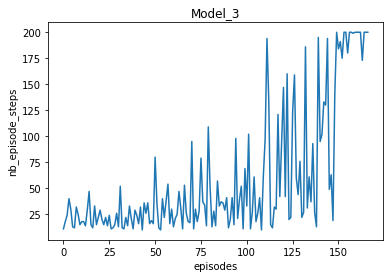

In [50]:
# summarize the history for number  of episode steps
plt.plot(history_3.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.title("Model_3")
plt.show()

In [33]:
#testing the model 3
for i in range(0,3):
    dqn_2.test(env, nb_episodes=20, visualize=False)
    print('\n')

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 198.000, steps: 198
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 194.000, steps: 194
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps:

#model 4

In [37]:
model_4 = Sequential()
model_4.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model_4.add(Flatten())
model_4.add(Dense(10, activation='relu'))
#addint the ayers
model_4.add(Dense(3, activation='relu'))


# adds a fully connected layer to the model with 16 units and a ReLU activation function.
model_4.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model_4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 4)                 0         
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
 dense_20 (Dense)            (None, 3)                 33        
                                                                 
 dense_21 (Dense)            (None, 2)                 8         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
memory = SequentialMemory(limit=2500, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)


# define the agent
dqn_3 = DQNAgent(model=model_4, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn_3.compile(Adam(lr=1e-3), metrics=['mae'])

history_4 = dqn_3.fit(env, nb_steps=10000, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   13/10000: episode: 1, duration: 0.612s, episode steps:  13, steps per second:  21, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.538 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   35/10000: episode: 2, duration: 0.030s, episode steps:  22, steps per second: 724, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   54/10000: episode: 3, duration: 0.026s, episode steps:  19, steps per second: 719, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   70/10000: episode: 4, duration: 0.023s, episode steps:  16, steps per second: 692, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.375 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   86/10000: episode: 5, duration: 0.021s, episode steps:  16, steps per second: 757, ep

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  111/10000: episode: 7, duration: 2.055s, episode steps:  12, steps per second:   6, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.167 [0.000, 1.000],  loss: 0.529786, mae: 0.530007, mean_q: 0.014715, mean_eps: 0.990505
  144/10000: episode: 8, duration: 0.275s, episode steps:  33, steps per second: 120, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.424 [0.000, 1.000],  loss: 0.483798, mae: 0.513084, mean_q: 0.055061, mean_eps: 0.988570
  158/10000: episode: 9, duration: 0.115s, episode steps:  14, steps per second: 122, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.643 [0.000, 1.000],  loss: 0.419364, mae: 0.505827, mean_q: 0.145953, mean_eps: 0.986455
  177/10000: episode: 10, duration: 0.166s, episode steps:  19, steps per second: 115, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 0.355698, mae: 0.504609, mean_q: 0.275434, mean_eps: 

From the log, it seems that the model is making progress in terms of improving its mean reward and mean_q value over time, which suggests that it is learning to make better decisions in the environment, but the previosu models are doing good than this model.

BUt mae  value is really good but the rewards are just near to 200

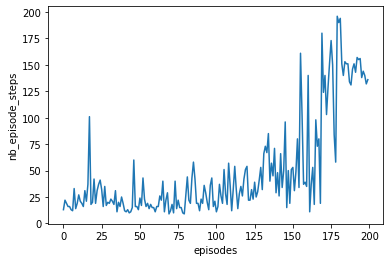

In [39]:
# summarize the history for number  of episode steps
plt.plot(history_4.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

In [40]:
#testing the model 3
for i in range(0,3):
    dqn_3.test(env, nb_episodes=20, visualize=False)
    print('\n')

Testing for 20 episodes ...
Episode 1: reward: 134.000, steps: 134
Episode 2: reward: 136.000, steps: 136
Episode 3: reward: 141.000, steps: 141
Episode 4: reward: 135.000, steps: 135
Episode 5: reward: 126.000, steps: 126
Episode 6: reward: 139.000, steps: 139
Episode 7: reward: 131.000, steps: 131
Episode 8: reward: 139.000, steps: 139
Episode 9: reward: 136.000, steps: 136
Episode 10: reward: 131.000, steps: 131
Episode 11: reward: 128.000, steps: 128
Episode 12: reward: 134.000, steps: 134
Episode 13: reward: 137.000, steps: 137
Episode 14: reward: 130.000, steps: 130
Episode 15: reward: 133.000, steps: 133
Episode 16: reward: 134.000, steps: 134
Episode 17: reward: 142.000, steps: 142
Episode 18: reward: 128.000, steps: 128
Episode 19: reward: 133.000, steps: 133
Episode 20: reward: 128.000, steps: 128


Testing for 20 episodes ...
Episode 1: reward: 129.000, steps: 129
Episode 2: reward: 137.000, steps: 137
Episode 3: reward: 129.000, steps: 129
Episode 4: reward: 141.000, steps:

#model_5

In [41]:
model_5 = Sequential()
model_5.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model_5.add(Flatten())
model_5.add(Dense(15, activation='relu'))
#addint the ayers
model_5.add(Dense(10, activation='relu'))
model_5.add(Flatten())
model_5.add(Dense(3, activation='relu'))

# adds a fully connected layer to the model with 16 units and a ReLU activation function.
model_5.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model_5.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 4)                 0         
                                                                 
 dense_22 (Dense)            (None, 15)                75        
                                                                 
 dense_23 (Dense)            (None, 10)                160       
                                                                 
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 3)                 33        
                                                                 
 dense_25 (Dense)            (None, 2)                 8         
                                                                 
Total params: 276
Trainable params: 276
Non-trainable 

In [42]:
memory = SequentialMemory(limit=2500, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)


# define the agent
dqn_5 = DQNAgent(model=model_5, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn_5.compile(Adam(lr=1e-3), metrics=['mae'])

history_5 = dqn_5.fit(env, nb_steps=10000, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   23/10000: episode: 1, duration: 2.079s, episode steps:  23, steps per second:  11, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.478 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   67/10000: episode: 2, duration: 0.107s, episode steps:  44, steps per second: 410, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  102/10000: episode: 3, duration: 3.925s, episode steps:  35, steps per second:   9, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 0.526543, mae: 0.525593, mean_q: 0.018583, mean_eps: 0.990910
  157/10000: episode: 4, duration: 0.477s, episode steps:  55, steps per second: 115, episode reward: 55.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 0.429653, mae: 0.508470, mean_q: 0.171076, mean_eps: 0.988390
  183/10000: episode: 5, duration: 0.248s, episode steps:  26, steps per second: 105, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.615 [0.000, 1.000],  loss: 0.302938, mae: 0.527379, mean_q: 0.515427, mean_eps: 0.984745
  206/10000: episode: 6, duration: 0.221s, episode steps:  23, steps per second: 104, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.478 [0.000, 1.000],  loss: 0.241657, mae: 0.571897, mean_q: 0.719082, mean_eps: 0

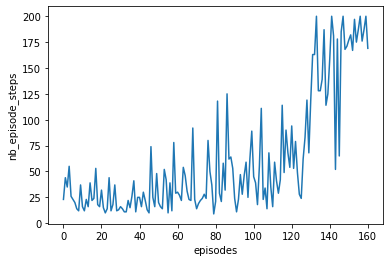

In [43]:
# summarize the history for number  of episode steps
plt.plot(history_5.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

In [45]:
#testing the model 5
for i in range(0,3):
    dqn_5.test(env, nb_episodes=20, visualize=False)
    print('\n')

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 199.000, steps: 199
Episode 3: reward: 191.000, steps: 191
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 190.000, steps: 190
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 187.000, steps: 187
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 181.000, steps: 181
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 167.000, steps: 167
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 197.000, steps: 197
Episode 19: reward: 188.000, steps: 188
Episode 20: reward: 200.000, steps: 200


Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 182.000, steps: 182
Episode 3: reward: 177.000, steps: 177
Episode 4: reward: 180.000, steps:

#model_6
model 6 for 5000 steps and learning rate is different

In [46]:
model_6 = Sequential()
model_6.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model_6.add(Flatten())
model_6.add(Dense(15, activation='relu'))
#addint the ayers
model_6.add(Dense(10, activation='relu'))
model_6.add(Flatten())
model_6.add(Dense(3, activation='relu'))

# adds a fully connected layer to the model with 16 units and a ReLU activation function.
model_6.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model_6.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 4)                 0         
                                                                 
 dense_26 (Dense)            (None, 15)                75        
                                                                 
 dense_27 (Dense)            (None, 10)                160       
                                                                 
 flatten_10 (Flatten)        (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 3)                 33        
                                                                 
 dense_29 (Dense)            (None, 2)                 8         
                                                                 
Total params: 276
Trainable params: 276
Non-trainable 

In [48]:
memory = SequentialMemory(limit=2500, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=5000)


# define the agent
dqn_6 = DQNAgent(model=model_6, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn_6.compile(Adam(lr=0.00015), metrics=['mae'])

history_6 = dqn_5.fit(env, nb_steps=5000, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 5000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   23/5000: episode: 1, duration: 0.667s, episode steps:  23, steps per second:  34, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.522 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   92/5000: episode: 2, duration: 0.074s, episode steps:  69, steps per second: 928, episode reward: 69.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.449 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  105/5000: episode: 3, duration: 0.056s, episode steps:  13, steps per second: 232, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.231 [0.000, 1.000],  loss: 1.274072, mae: 6.536688, mean_q: 12.287602, mean_eps: 0.981550
  150/5000: episode: 4, duration: 0.440s, episode steps:  45, steps per second: 102, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.422 [0.000, 1.000],  loss: 1.994155, mae: 6.421136, mean_q: 11.889154, mean_eps: 0.977140
  170/5000: episode: 5, duration: 0.179s, 

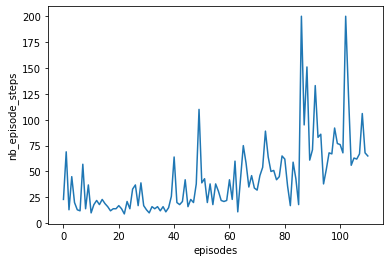

Testing for 20 episodes ...
Episode 1: reward: 65.000, steps: 65
Episode 2: reward: 71.000, steps: 71
Episode 3: reward: 64.000, steps: 64
Episode 4: reward: 82.000, steps: 82
Episode 5: reward: 73.000, steps: 73
Episode 6: reward: 69.000, steps: 69
Episode 7: reward: 77.000, steps: 77
Episode 8: reward: 68.000, steps: 68
Episode 9: reward: 59.000, steps: 59
Episode 10: reward: 91.000, steps: 91
Episode 11: reward: 76.000, steps: 76
Episode 12: reward: 87.000, steps: 87
Episode 13: reward: 87.000, steps: 87
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 71.000, steps: 71
Episode 16: reward: 129.000, steps: 129
Episode 17: reward: 84.000, steps: 84
Episode 18: reward: 67.000, steps: 67
Episode 19: reward: 77.000, steps: 77
Episode 20: reward: 91.000, steps: 91


Testing for 20 episodes ...
Episode 1: reward: 101.000, steps: 101
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 69.000, steps: 69
Episode 4: reward: 90.000, steps: 90
Episode 5: reward: 77.000, steps: 7

In [49]:
# summarize the history for number  of episode steps
plt.plot(history_6.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

#testing the model 5
for i in range(0,3):
    dqn_6.test(env, nb_episodes=20, visualize=False)
    print('\n')

Conclusion:
Model 2 and model 3  gets similar result but, I have choosen the model which is having the less mae that is model_2